# Feature Scoring
Where SOBOL allowed us to visually inspect the influence of uncertainties on our outcomes of interest, feature scoring quantifies this influence by assigning an importance score from 0-1 indicating the effect of an uncertainty on a outcome of interest. This strengthens our knowledges on which uncertainties are most influencial for our stakeholder. Just like with SOBOL, this analysis utilises the results of experiments ran without any policies implemented.

In [1]:
# Importing necessary libraries
from ema_workbench.util import utilities
from ema_workbench.analysis import feature_scoring, dimensional_stacking
from custom_problem_formulation import get_model_for_problem_formulation

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

/Users/wouter/.pyenv/versions/3.12.2/envs/EPA141A_Model_Based_Decision_Making_Env/lib/python3.12/site-packages/ema_workbench/em_framework/__init__.py:101: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")


In [3]:
# Load the model and results from the base case
dike_model, planning_steps = get_model_for_problem_formulation()
experiments, outcomes = utilities.load_results('./results/base_case.tar.gz')

# Drop the levers from the experiments
experiments = experiments.drop(columns=[l.name for l in dike_model.levers])

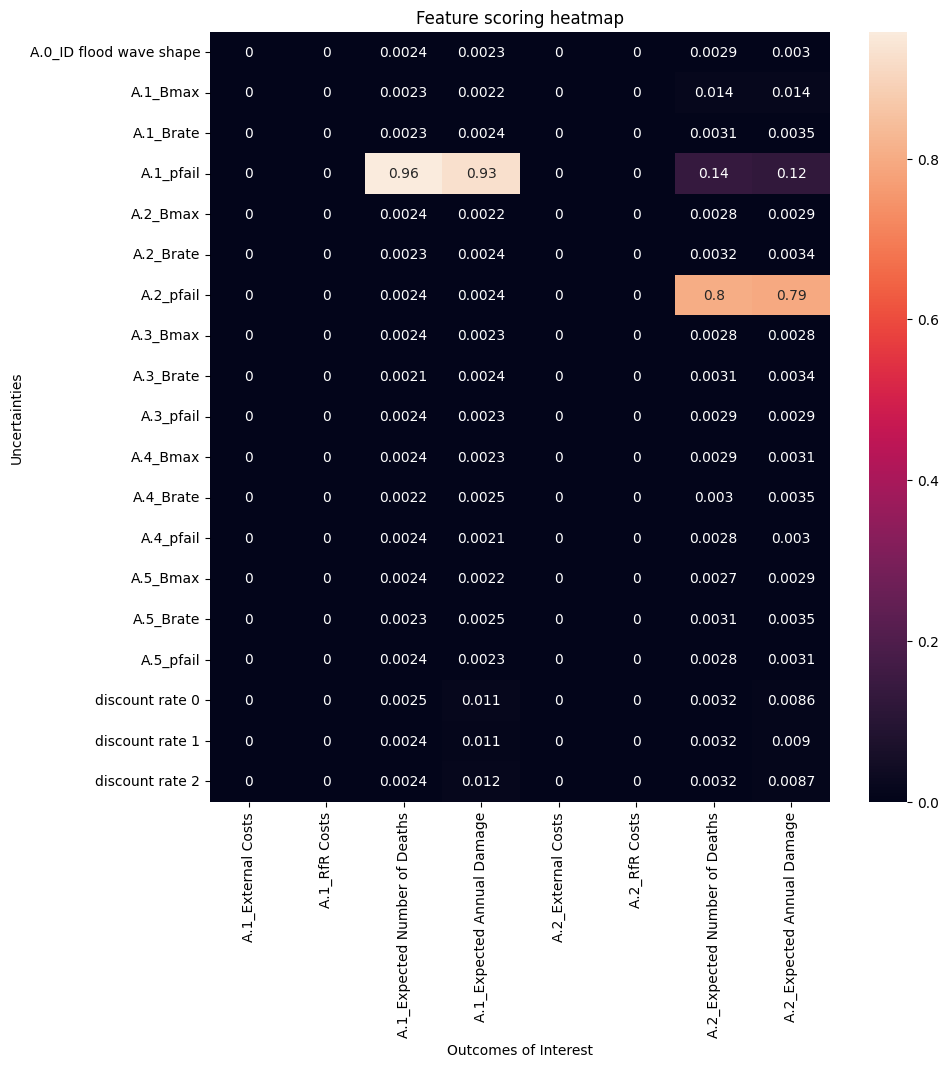

In [4]:
# Compute the feature scores for the uncertainties
feature_scores = feature_scoring.get_feature_scores_all(experiments, outcomes)

# Plot the feature scores
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(feature_scores, annot=True, ax=ax)

plt.title('Feature scoring heatmap')
plt.xlabel('Outcomes of Interest')
plt.ylabel('Uncertainties')
plt.savefig('./images/Feature_Scoring_Uncertainties.png')
plt.show()

The feature score heatmap shows comparable results to what we found in the SOBOL analysis. Both 'A.1_Expected Number of Deaths' and 'A.1_Expected Annual Damage' are primarily affected by 'A.1_pfail', where 'A.1_Expected Annual Damage' is also very slightly affected by the discount rates. These effects make sense for the same reasons mentioned in the discussion of the SOBOL results. 

Again, we also see comparable results for 'A.2_Expected Number of Deaths' and 'A.2_Expected Annual Damage'. The effects and reasoning is the same as for the A.1 results, with the only change being that next to 'A.2_pfail', 'A.1_pfail' also has an effect here, due to A.2 being downstream from A.1.

# Dimensional Stacking
We also perform a dimensional stacking. By only incorporating the outcomes which are in the worst 5% for each outcome of interest, we gain an additional insight into which combinations of uncertainties often lead to worst case scenarios in which the outcome of interest has a excpetionally high value (which is undesirable).

In [5]:
# Creating a function to plot the dimensional stack
def plot_dimensional_stack(experiments, outcomes, outcome_name, percentile=95, nbins=4):
    """
    Creates a pivot plot for the given outcome, sets the title, saves the plot to a file, and displays it.

    Parameters:
    experiments (DataFrame): The experiments DataFrame.
    outcomes (DataFrame): The outcomes DataFrame.
    outcome_name (str): The name of the outcome variable.
    percentile (int): The percentile to use for categorizing high-risk outcomes.
    nbins (int): Number of bins for the pivot plot.
    """
    # By setting percentile to 95, we are looking at the top 5% of outcomes
    dimensional_stacking.create_pivot_plot(experiments, outcomes > np.percentile(outcomes, percentile), 3, nbins=nbins)
    
    plt.title(outcome_name)
    plt.savefig(f'./images/Dimensional_Stacking_{outcome_name}.png')
    plt.show()


/Users/wouter/.pyenv/versions/3.12.2/envs/EPA141A_Model_Based_Decision_Making_Env/lib/python3.12/site-packages/ema_workbench/analysis/dimensional_stacking.py:408: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(x_y_concat, values=ooi_label, index=rows, columns=columns, dropna=False)


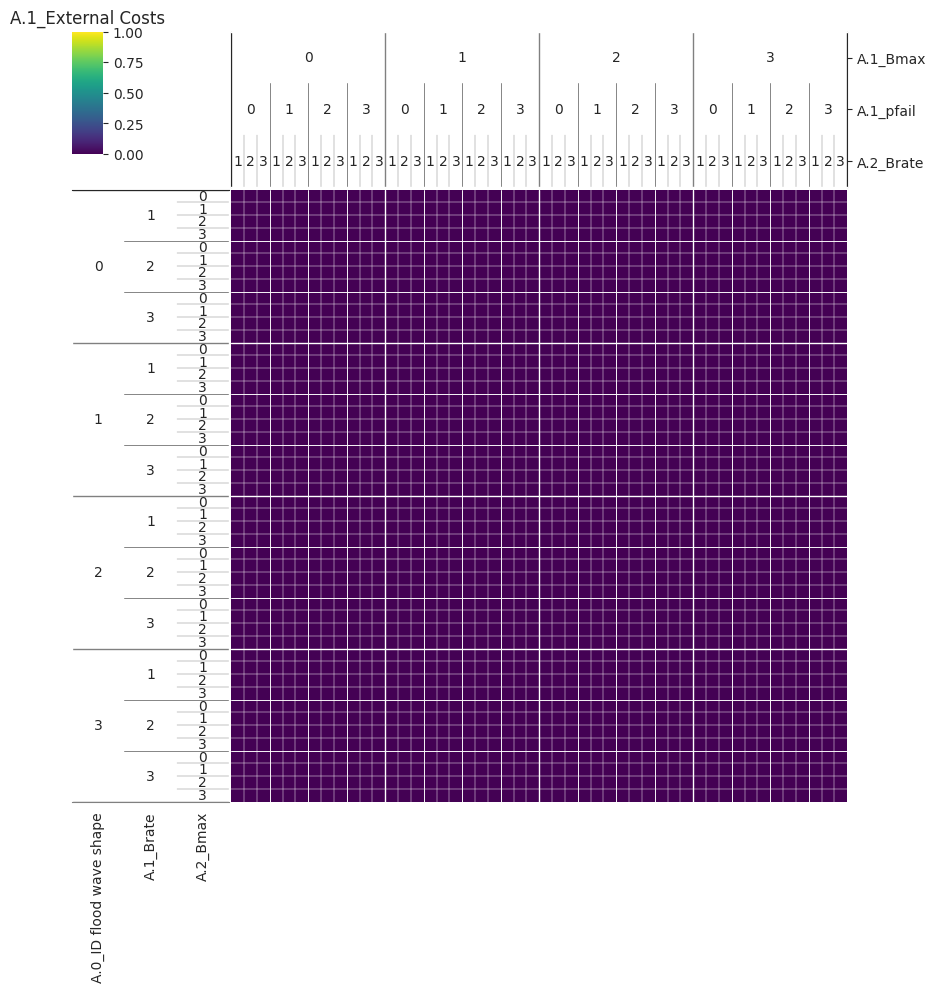

In [6]:
plot_dimensional_stack(experiments, outcomes['A.1_External Costs'], 'A.1_External Costs')

Just like with the SOBOL results, looking at the external costs doesn't yield any interesting results for dimensional stacking. This is because the same set of base case results was used for this analysis, meaning zero policies are implemented and there thus also aren't any external costs. However, we did plot them here just for completeness sake.

/Users/wouter/.pyenv/versions/3.12.2/envs/EPA141A_Model_Based_Decision_Making_Env/lib/python3.12/site-packages/ema_workbench/analysis/dimensional_stacking.py:408: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(x_y_concat, values=ooi_label, index=rows, columns=columns, dropna=False)


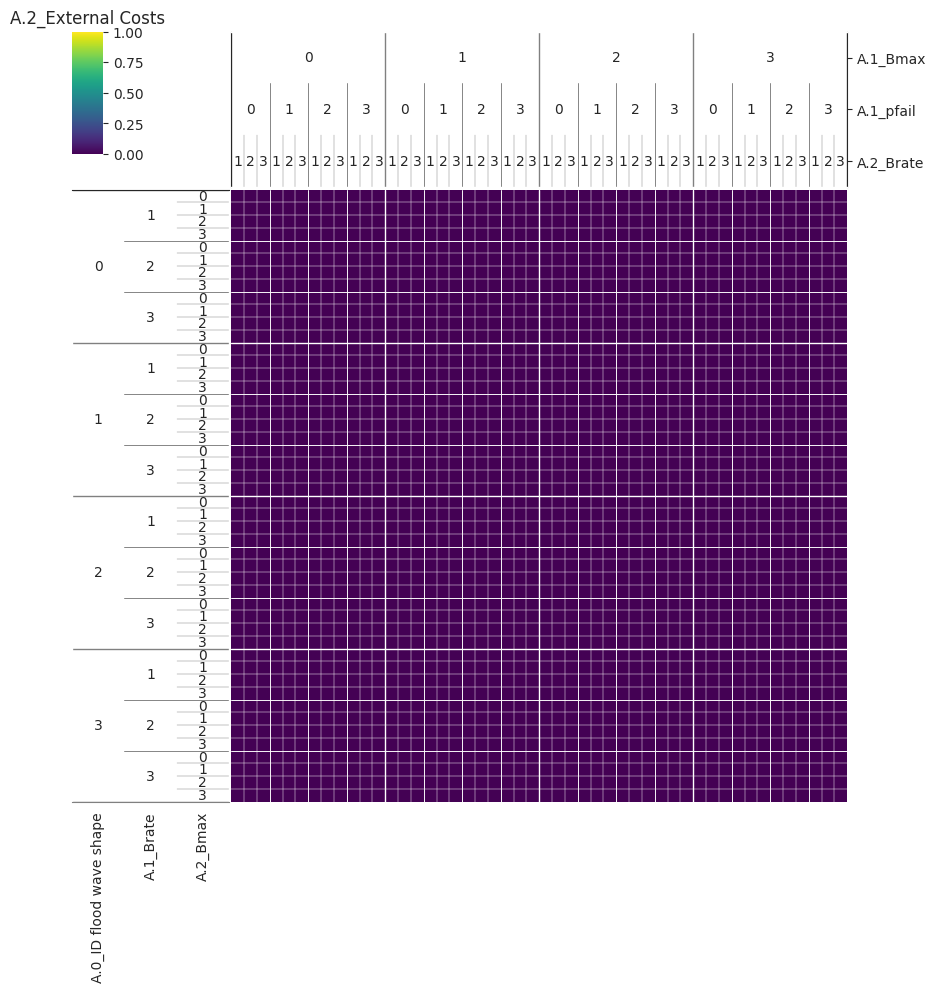

In [7]:
plot_dimensional_stack(experiments, outcomes['A.2_External Costs'], 'A.2_External Costs')

'A.2_External Costs' shows the same results as 'A.1_External Costs', for the same reasoning as discussed above.

/Users/wouter/.pyenv/versions/3.12.2/envs/EPA141A_Model_Based_Decision_Making_Env/lib/python3.12/site-packages/ema_workbench/analysis/dimensional_stacking.py:408: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(x_y_concat, values=ooi_label, index=rows, columns=columns, dropna=False)


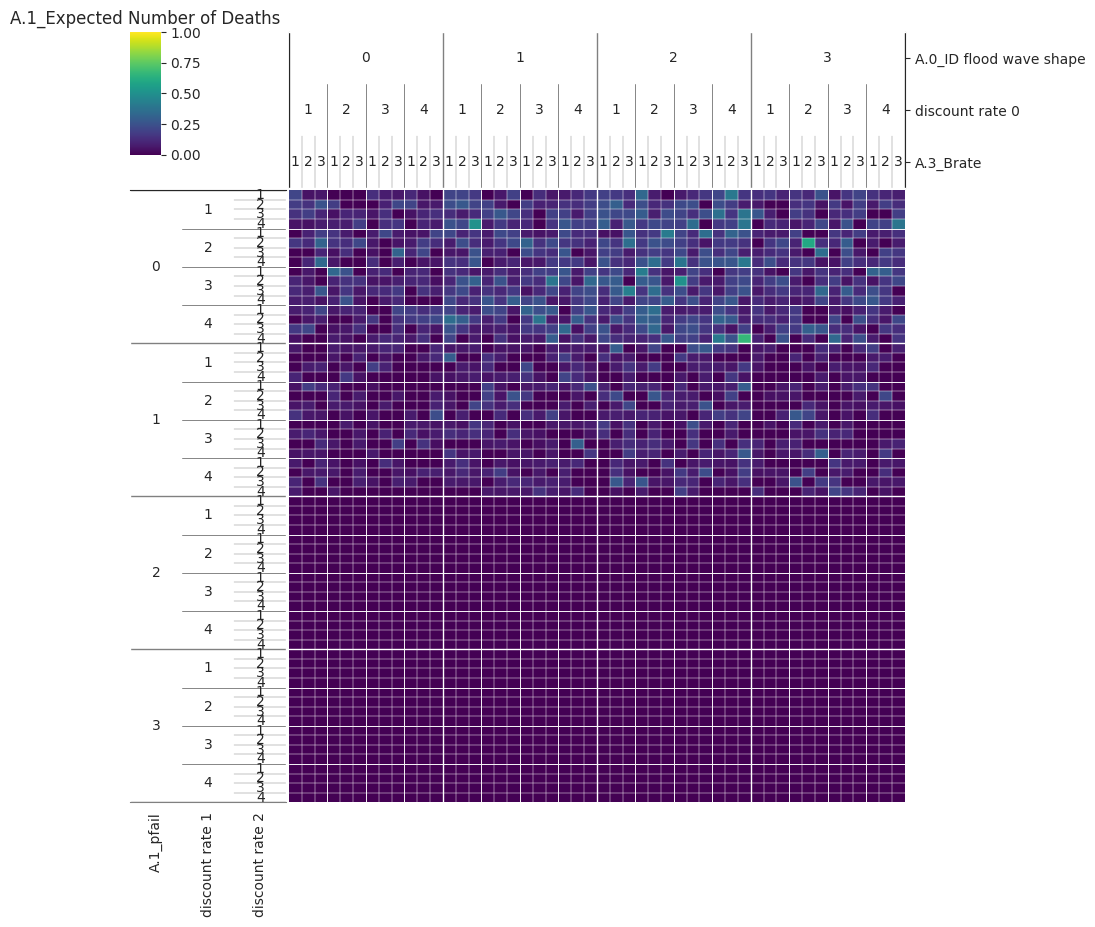

In [11]:
plot_dimensional_stack(experiments, outcomes['A.1_Expected Number of Deaths'], 'A.1_Expected Number of Deaths')

The graph above confirms that the for the top 5% of worst case scenarios for 'A.1_Expected Number of Deaths', almost all of them fall into the lowest 'A.1_pfail' bin, with a few falling into the second bin. This makes sense, as the lower 'A.1_pfail', the higher the chance of a flood. We also see that a slight majority of these outcomes fall into the third bin of 'A.0_ID Flood wave shape', indicating that there might be a wave shape responsible for a bit more deaths in A.1. The other uncertainties shown in the graph don't seem to have a significant influence. 

/Users/wouter/.pyenv/versions/3.12.2/envs/EPA141A_Model_Based_Decision_Making_Env/lib/python3.12/site-packages/ema_workbench/analysis/dimensional_stacking.py:408: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(x_y_concat, values=ooi_label, index=rows, columns=columns, dropna=False)


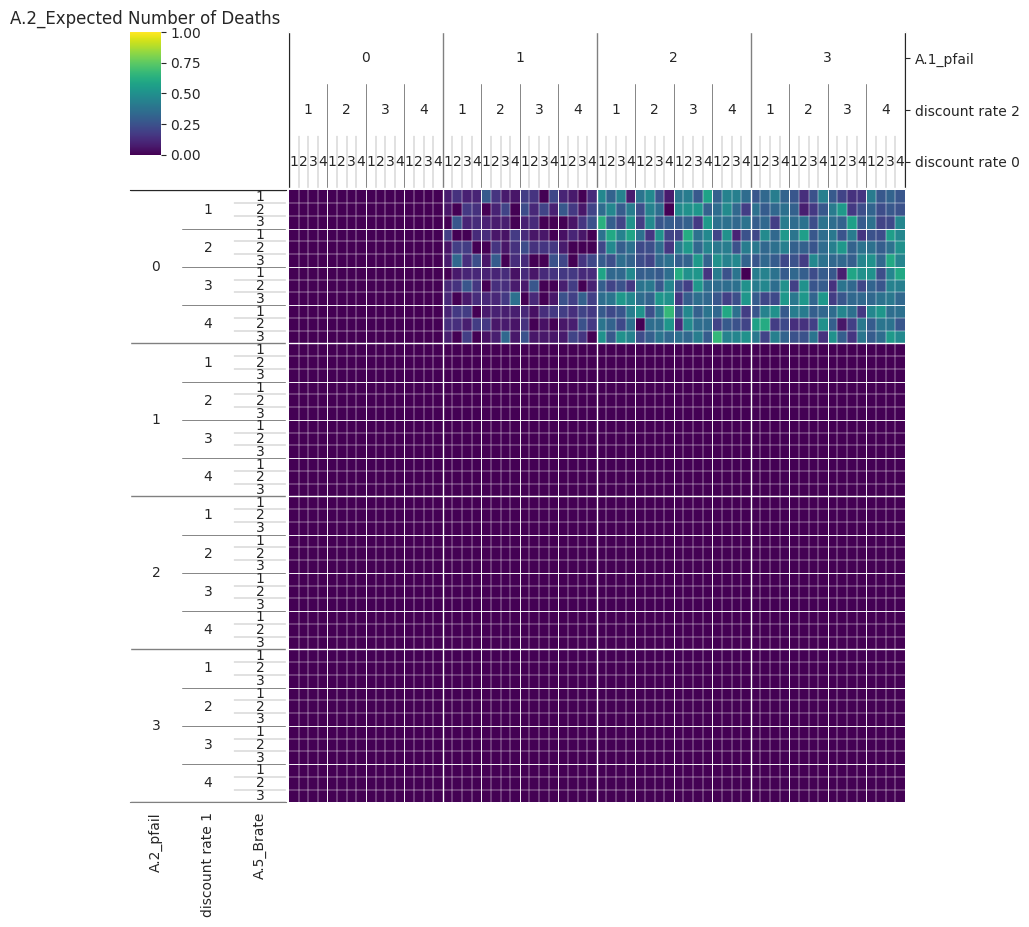

In [12]:
plot_dimensional_stack(experiments, outcomes['A.2_Expected Number of Deaths'], 'A.2_Expected Number of Deaths')

The graph above shows that the for the top 5% of worst case scenarios for 'A.2_Expected Number of Deaths', all of them fall into the lowest 'A.2_pfail' bin. This makes sense, as the lower 'A.2_pfail', the higher the chance of a flood. We also see that a majority of these outcomes fall into the third and fourth bin of 'A.1_pfail', this makes sense, as a lower 'A.1_pfail' would mean a higher chance of flooding in A.1, in which case the load on dikes in A.2 would decrease and so what their chance of flooding. Again, the other shown uncertainties don't have a significant effect.

/Users/wouter/.pyenv/versions/3.12.2/envs/EPA141A_Model_Based_Decision_Making_Env/lib/python3.12/site-packages/ema_workbench/analysis/dimensional_stacking.py:408: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(x_y_concat, values=ooi_label, index=rows, columns=columns, dropna=False)


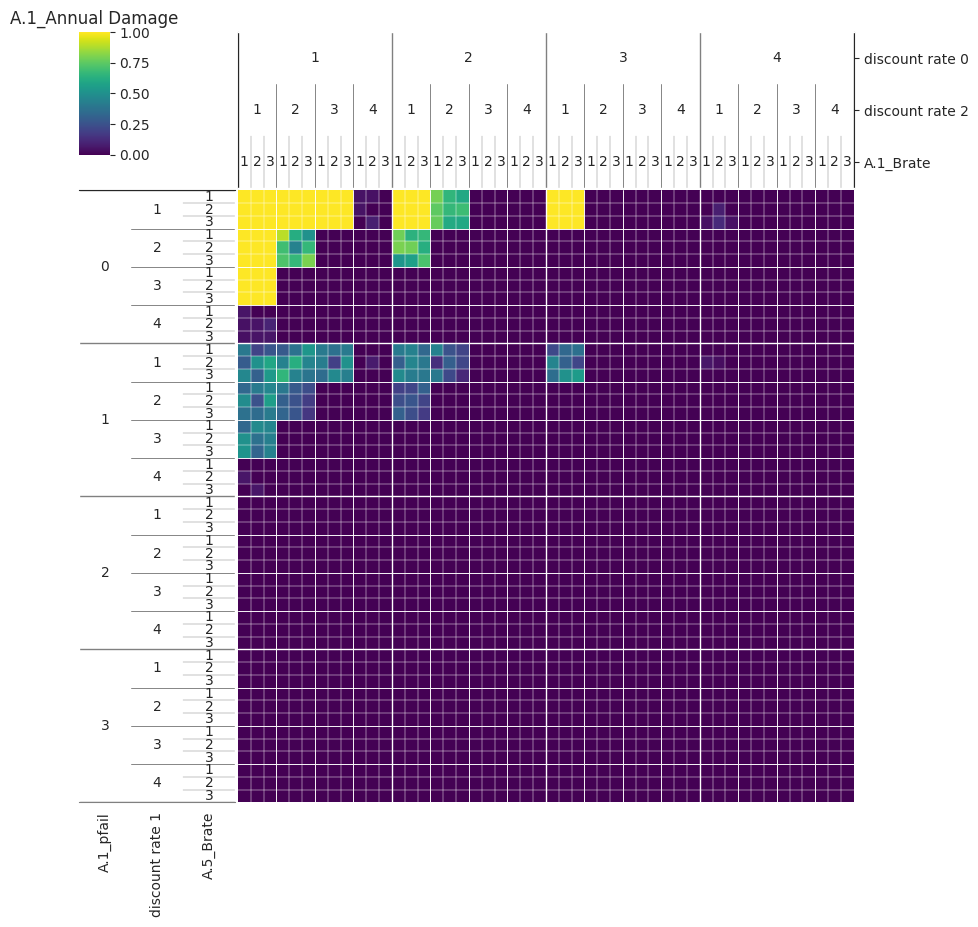

In [13]:
plot_dimensional_stack(experiments, outcomes['A.1_Expected Annual Damage'], 'A.1_Annual Damage')

This graph shows that the biggest amount of annual damages in A.1 happens with a low 'A.1_pfail', which is logical. It also shows that, unlike for the expected amount of deaths, the amount of damages is mainly affected by the discount rates.

/Users/wouter/.pyenv/versions/3.12.2/envs/EPA141A_Model_Based_Decision_Making_Env/lib/python3.12/site-packages/ema_workbench/analysis/dimensional_stacking.py:408: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(x_y_concat, values=ooi_label, index=rows, columns=columns, dropna=False)


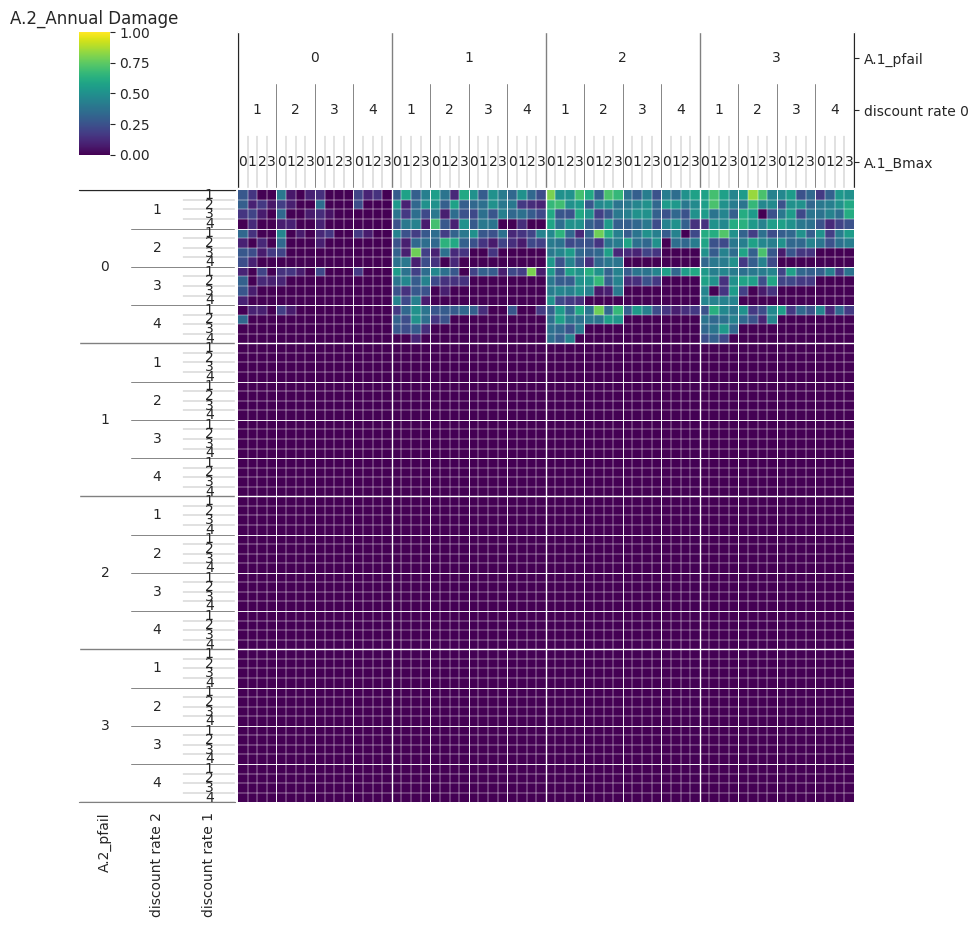

In [14]:
plot_dimensional_stack(experiments, outcomes['A.2_Expected Annual Damage'], 'A.2_Annual Damage')

This graph shows that the biggest amount of annual damages in A.2 happens with a low 'A.2_pfail', which is logical. It also shows that, unlike for the expected amount of deaths, the amount of damages is mainly affected by the discount rates. Additionally, and just like we already saw in all other analyses, A.2 effects are also affected by 'A.1_pfail'.